In [1]:
import sys
!{sys.executable} -m pip install imblearn

    100% |████████████████████████████████| 153kB 5.6MB/s ta 0:00:01
thinc 6.11.2 requires hypothesis<3,>=2, which is not installed.
thinc 6.11.2 requires pathlib<2.0.0,>=1.0.0, which is not installed.
spacy 2.0.11 requires pathlib, which is not installed.
smart-open 1.6.0 requires bz2file, which is not installed.
msgpack-numpy 0.4.3 requires msgpack>=0.3.0, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
thinc 6.11.2 has requirement msgpack-numpy==0.4.1, but you'll have msgpack-numpy 0.4.3 which is incompatible.
thinc 6.11.2 has requirement msgpack-python==0.5.4, but you'll have msgpack-python 0.5.6 which is incompatible.
spacy 2.0.11 has requirement regex==2017.4.5, but you'll have regex 2018.6.21 which is incompatible.
spacy 2.0.11 has requirement thinc<6.11.0,>=6.10.1, but you'll have thinc 6.11.2 which is incompatible.
ipywidgets 7.1.0 has requirement widgetsnbextension~=3.1.0, but you'll have widgetsnbextension 3.0.2 which is incompatible.
You

In [5]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cross_validation import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest

In [6]:
df = pd.read_csv("./all/train.csv")
weather = pd.read_csv("./all/weather.csv")
spray = pd.read_csv("./all/spray.csv")

In [4]:
tables = [df,weather, spray]

In [7]:
result = pd.concat(tables)

/anaconda2/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


In [8]:
result.Date = pd.to_datetime(result.Date)
result.set_index('Date', inplace=True)

Text(0.5,0,'Year')

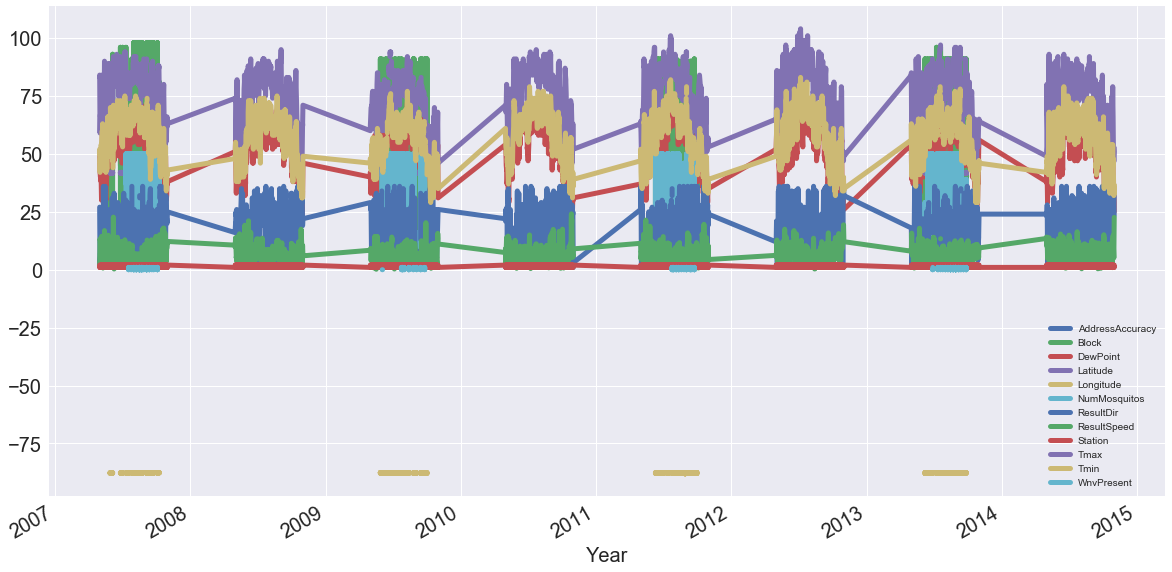

In [9]:
result.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

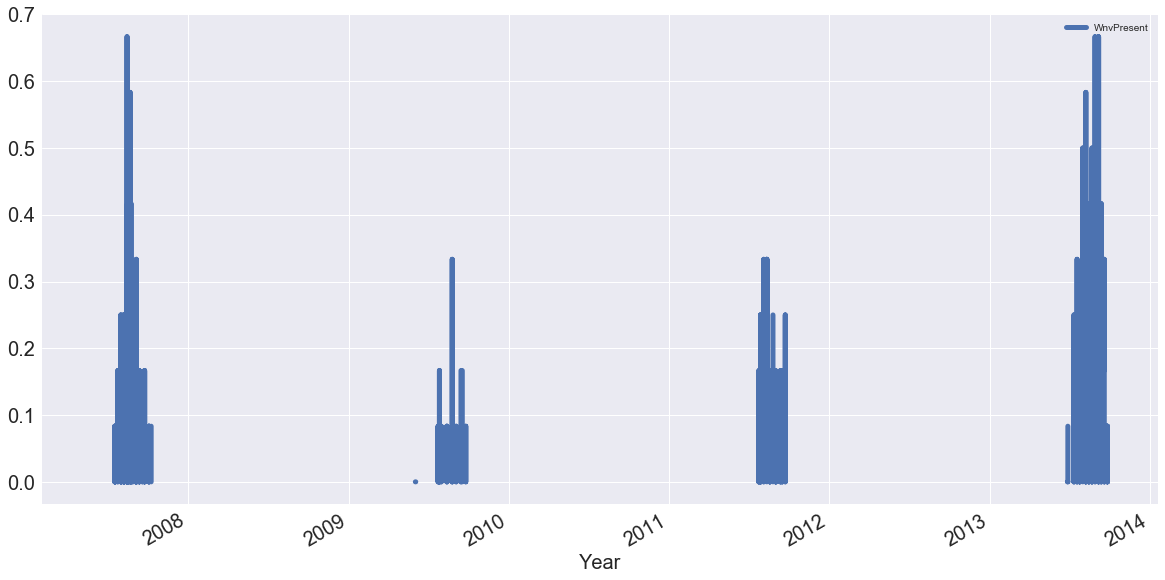

In [10]:
wnv = result[['WnvPresent']]
wnv.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

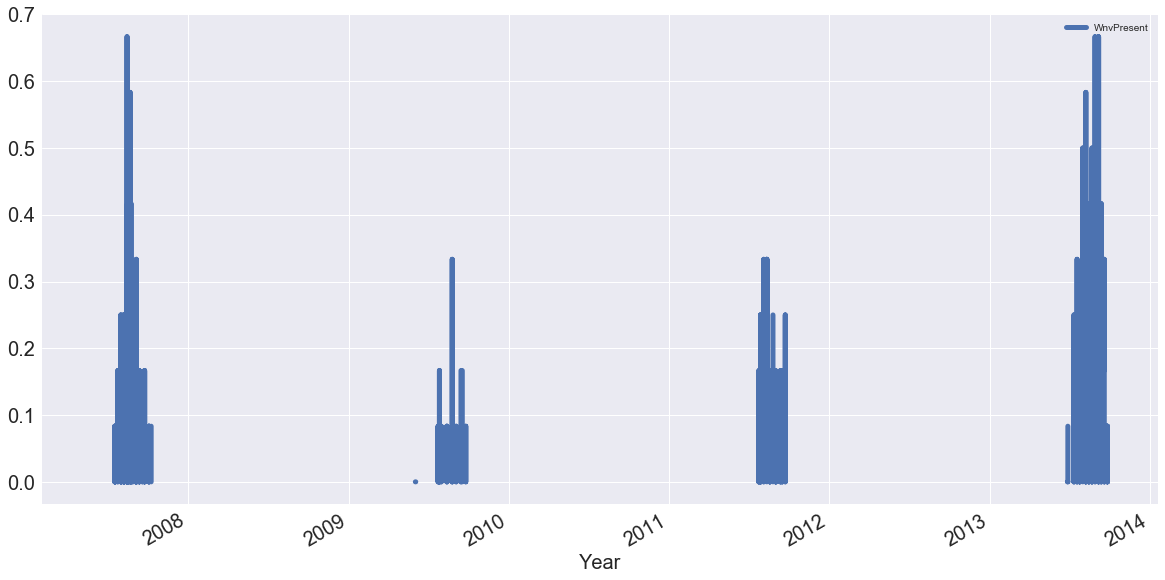

In [11]:
nm = result[['NumMosquitos']]
wnv.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

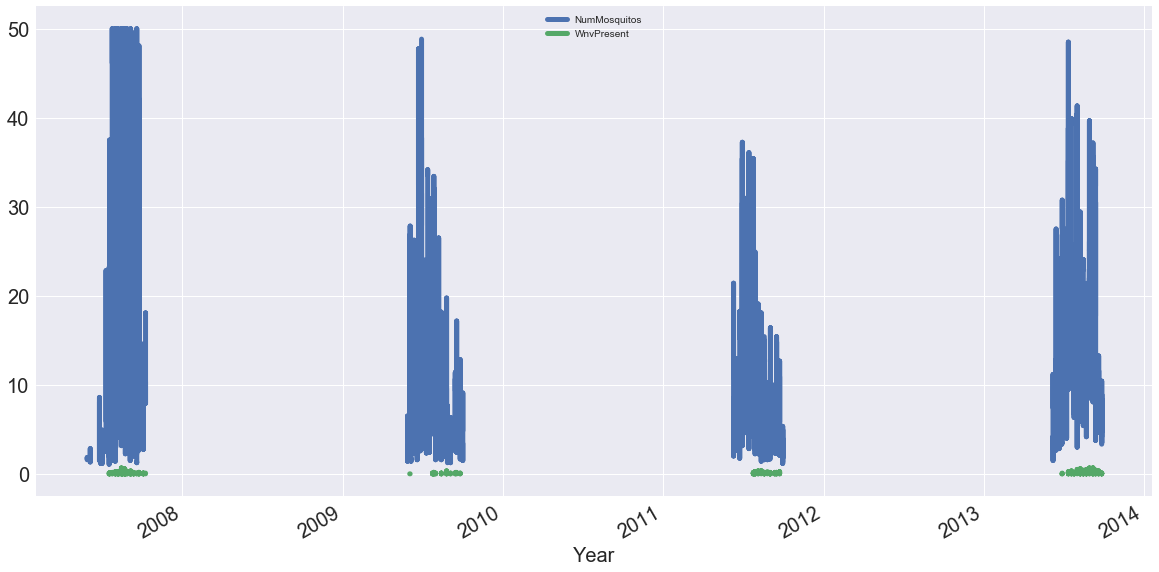

In [12]:
wnv = pd.concat([nm.rolling(12).mean(), wnv.rolling(12).mean()], axis=1)
wnv.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

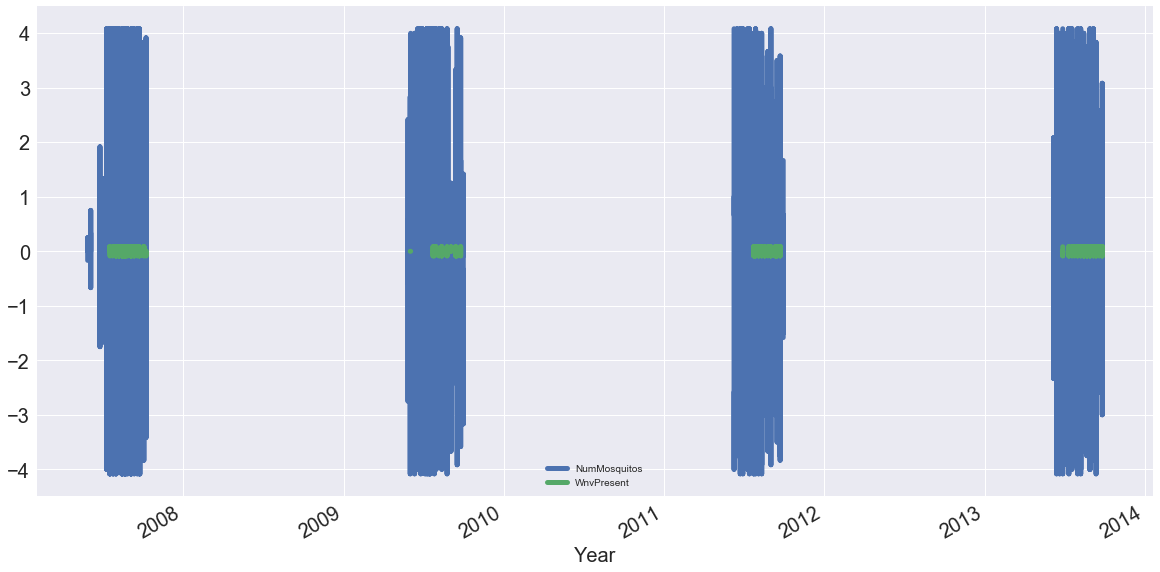

In [13]:
wnv.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Cleaning

In [14]:
result.replace({'M': None}, inplace = True)

In [15]:
result.replace({'T': '0.00001'}, inplace = True)

In [16]:
result.replace({'-': None}, inplace = True)

In [17]:
columns = ["Block","AddressAccuracy", "Cool", "Heat","Depart", "Depth", "PrecipTotal","StnPressure","SeaLevel","ResultSpeed", "ResultDir", "AvgSpeed", "WetBulb", "Sunrise","SnowFall","Sunset", "DewPoint", "Tmax", "Tmin", "Tavg", "Depth"]

In [18]:
result.replace({'M': None}, inplace = True)
result.replace({'T': '0.00001'}, inplace = True)
result.replace({'  T': '0.00001'}, inplace = True)
result.replace({'-': None}, inplace = True)
    
for column in columns:
    result.replace({'M': None}, inplace = True)
    result.replace({'T': '0.00001'}, inplace = True)
    result.replace({'  T': '0.00001'}, inplace = True)
    result.replace({'-': None}, inplace = True)

In [19]:
for column in columns:
    result[column] = result[column].astype(float)
    result[column] = result[column].fillna(result[column].mean(skipna = True))

In [20]:
result = result[result["WnvPresent"].isnull() == False]

In [21]:
result.corr()["WnvPresent"].sort_values(ascending=False)

WnvPresent         1.000000e+00
NumMosquitos       1.968196e-01
Latitude           2.869683e-02
AddressAccuracy    8.063718e-03
Block              4.877472e-03
Sunset             1.048428e-14
Tmin               9.733156e-15
Tmax               9.459661e-15
StnPressure        9.036438e-15
Tavg               5.084146e-15
SeaLevel           4.845128e-15
Heat               3.279778e-15
Cool              -4.475436e-15
AvgSpeed          -5.013205e-15
ResultDir         -5.514018e-15
Depart            -6.275666e-15
ResultSpeed       -7.045345e-15
DewPoint          -7.410797e-15
Sunrise           -9.603718e-15
PrecipTotal       -1.136149e-14
SnowFall          -1.201822e-14
WetBulb           -1.222245e-14
Longitude         -6.034514e-02
Depth                       NaN
Station                     NaN
Water1                      NaN
Name: WnvPresent, dtype: float64

In [22]:
result["WnvPresent"].value_counts()

0.0    9955
1.0     551
Name: WnvPresent, dtype: int64

Select the five best features

In [32]:
training_features = result[columns]
training_target = result["WnvPresent"]

In [33]:
kbest = SelectKBest(k=5)

In [34]:
kbest.fit_transform(training_features,training_target)

/anaconda2/envs/dsi/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 5 20] are constant.
  UserWarning)
/anaconda2/envs/dsi/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[1.31330109e-01, 2.99681295e+01, 8.58044883e+00, 4.80646739e+02,
        6.72400273e+01],
       [1.31330109e-01, 2.99681295e+01, 8.58044883e+00, 4.80646739e+02,
        6.72400273e+01],
       [1.31330109e-01, 2.99681295e+01, 8.58044883e+00, 4.80646739e+02,
        6.72400273e+01],
       ...,
       [1.31330109e-01, 2.99681295e+01, 8.58044883e+00, 4.80646739e+02,
        6.72400273e+01],
       [1.31330109e-01, 2.99681295e+01, 8.58044883e+00, 4.80646739e+02,
        6.72400273e+01],
       [1.31330109e-01, 2.99681295e+01, 8.58044883e+00, 4.80646739e+02,
        6.72400273e+01]])

In [35]:
best_features = [x for (x,y) in zip(columns, kbest.get_support().tolist()) if y == 1]

Best features to choose

In [36]:
best_features

['PrecipTotal', 'SeaLevel', 'AvgSpeed', 'Sunrise', 'Tavg']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(training_features, training_target,
                                                  test_size = .2,
                                                  random_state=11, shuffle = True)

Oversampling 

In [41]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_mod, y_train_mod = sm.fit_sample(x_train, y_train)
# x_test_mod, y_test_mod = sm.fit_sample(x_test, y_test)

/anaconda2/envs/dsi/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [42]:
lg = LogisticRegression()

In [43]:
cross_val_score(lg, x_train_mod,y_train_mod,n_jobs=-1, cv = 10)

array([0.51319095, 0.48932161, 0.47047739, 0.5       , 0.51193467,
       0.51319095, 0.5169598 , 0.47861635, 0.51446541, 0.5081761 ])

In [511]:
cross_val_score(lg, x_test,y_test,n_jobs=-1, cv = 10)

array([0.9478673 , 0.9478673 , 0.9478673 , 0.9478673 , 0.95238095,
       0.95238095, 0.95238095, 0.95238095, 0.95215311, 0.95215311])

In [44]:
lg.fit(x_train_mod, y_train_mod)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
predicted = lg.predict(x_train_mod)
lg.fit(x_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
lg.score(x_train_mod, y_train_mod)

0.5

In [515]:
roc_auc_score(y_train_mod, predicted)

0.5

In [48]:
lg.score(x_test, y_test)

0.950523311132255

In [49]:
predicted = lg.predict(x_test)

In [50]:
roc_auc_score(y_test, predicted)

0.5

Gradient Boosting Classifier

In [51]:
gbc = GradientBoostingClassifier()

In [52]:
cross_val_score(gbc, x_train_mod,y_train_mod, n_jobs=-1, cv = 10)

array([0.61871859, 0.63065327, 0.65640704, 0.65829146, 0.64635678,
       0.62374372, 0.65515075, 0.67044025, 0.67295597, 0.64339623])

In [53]:
cross_val_score(gbc, x_test,y_test, n_jobs=-1, cv = 10)

array([0.9478673 , 0.9478673 , 0.9478673 , 0.9478673 , 0.95238095,
       0.95238095, 0.95238095, 0.95238095, 0.95215311, 0.95215311])

In [54]:
gbc.fit(x_train_mod, y_train_mod)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [55]:
gbc.fit(x_test, y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [57]:
yhat=gbc.predict(x_test)
pd.Series(yhat).value_counts()

0.0    2102
dtype: int64

In [58]:
pd.Series(y_test).value_counts()

0.0    1998
1.0     104
Name: WnvPresent, dtype: int64

In [59]:
gbc.score(x_train_mod, y_train_mod)

0.5

In [60]:
gbc.score(x_test, y_test)

0.950523311132255

In [61]:
predicted = gbc.predict(x_test)

In [62]:
roc_auc_score(y_test, predicted)

0.5

Random Forest Classifier

In [63]:
rfc = RandomForestClassifier()

In [64]:
cross_val_score(rfc, x_train_mod,y_train_mod, n_jobs=-1)

array([0.65529589, 0.66383861, 0.67929864])

In [65]:
cross_val_score(rfc, x_test,y_test, n_jobs=-1)

array([0.94579173, 0.95007133, 0.94714286])

In [66]:
rfc.fit(x_train_mod, y_train_mod)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
rfc.fit(x_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rfc.score(x_train_mod, y_train_mod)

0.5

In [69]:
rfc.score(x_test, y_test)

0.950523311132255

In [70]:
predicted = rfc.predict(x_test)

In [71]:
roc_auc_score(y_test, predicted)

0.5